# k-Nearest Neighbours (kNN)

kNN is a supervised method that can be used to solve classification problems and regression problems.

Given

- a training set $\mathcal{T} = \left\{(x_1, y_1), (x_2, y_2), \cdots, (x_n, y_n) \right\}$
- a positive integer $k$ 
- a test observation $x'$

Let $\mathcal{N}$ denote the $k$ data points in the training set $\mathcal{T}$ that are closest to $x'$.

In kNN classification, the method selects the most frequent $y_i \in \mathcal{N}$ where $i \in {1,2, \cdots, k}$.

In kNN regression, the method estimates $\hat{y}$ for $x'$ by computing the mean of the $k$ points in the training set that are closest to $x'$:

$$
\hat{y} = \frac{1}{k} \sum_{x_i \in \mathcal{N} } y_i
$$

Performance of the kNN algorithm depends on several factors including:

- a suitable distance measure: we can use the Euclidean distance for numeric features but it has issues in higher dimensions. There exist many <a href="https://www.rdocumentation.org/packages/fingerprint/versions/3.5.4/topics/distance-methods">distance metrics</a>.
- an appropriate $k$ value: Choosing an appropriate $k$ can be difficult and depends on the <a href="http://scott.fortmann-roe.com/docs/BiasVariance.html">bias-variance tradeoff</a>. A small $k$ value has low bias but high variance whereas a large $k$ value provide a smoother and less variable fit. There are some rule-of-thumb for picking the $k$ value. The value of $k$ must not be a multiple of the number of classes to avoid ties. For instance, the value of $k$ must be odd if problems with only two classes.

Unlike other methods that build a model of the training (labelled) data, kNN has no explicit knowledge representation of a model. This means that predicting using kNN is associated with a high computational cost especially for large data sets. In addition, kNN performs poorly for high dimensional data because "the ratio of the distances of the nearest and farthest neighbors to a given target in high dimensional space is almost 1 for a wide variety of data distributions and distance functions" [<a href="https://bib.dbvis.de/uploadedFiles/155.pdf">#<a>].

## Explore Credit Card Fraud Detection Data Set

Next, we explore the <a href="https://www.kaggle.com/dalpozz/creditcardfraud">Credit Card Fraud Detection Dataset</a> on Kaggle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Check if there are missing data.

In [4]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

### Normalise the Data

The features V1, V2, ... and V28 are normalised because of the PCA transformation. However, the Amount feature is not. Since the kNN method relies distances between the observation, we need to rescale this feature.

In [5]:
from sklearn.preprocessing import StandardScaler

ft_amount = df['Amount'].values.reshape(-1, 1)

scaler = StandardScaler()
scaler.fit(ft_amount)

df['AmountNormalised'] = scaler.transform(ft_amount)

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,AmountNormalised
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


We can't use the Time feature, so let us get rid of it. We don't need the Amount feature either.

In [7]:
df.drop(['Time', 'Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,AmountNormalised
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### Re-sample the Data

Now let us check the size of the dataset.

In [8]:
df.shape

(284807, 30)

The data set contains 284,807 examples. As kNN does not perform well with large data sets, we must find a way to reduce of size. We also need to ensure that the data is balanced before we run our kNN classifier. 

In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Just by looking at the numbers above, we can see that the data is not balanced. Let us print out the proportion of data that is in class 0.

In [10]:
def print_class0_proportion(target_column):
    class_0, class_1 = pd.Series(target_column).value_counts()
    class_0_pct = round(class_0 / target_column.shape[0] * 100, 2)
    print('Class 0 represents {0}% of all the observations.'.format(class_0_pct))

In [11]:
print_class0_proportion(df['Class'])

Class 0 represents 99.83% of all the observations.


The data set is highly unbalanced. Only a very small proportion (0.17%) of the transactions are fraudulent while the majority of the examples are normal. In the real world, this makes sense. However, training a classifier with unbalanced data results in predictions that are biased towards predicting the majority class. Therefore, we must re-sample the data set so both classes have approximately 50-50 ratio. We can either:

- Undersample the majority class or
- Oversample the minority class

Undersampling the majority class is better for this data set because we want to reduce the number of examples to get kNN to perform well.

We use the *imbalance-learn* library from *scikit-learn-contrib* project. Remember to install it: `conda install -c glemaitre imbalanced-learn`.

In [12]:
X = df.drop('Class', axis=1)
y = df['Class']

In [13]:
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = sampler.fit_sample(X, y)

Now the ratio should be around 50 percent.

In [14]:
print_class0_proportion(y_resampled)

Class 0 represents 50.0% of all the observations.


### Partition the Data

Now we are ready to partition the data into training set and test set.

In [15]:
from sklearn.model_selection import train_test_split
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=.3)

### Pick an Appropriate $k$ Value

An appropriate $k$ value for the kNN algorithm is the one that yields the lowest error or the highest score. We can use 10-Fold Cross Validation to estimate the score associated with each $k$.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

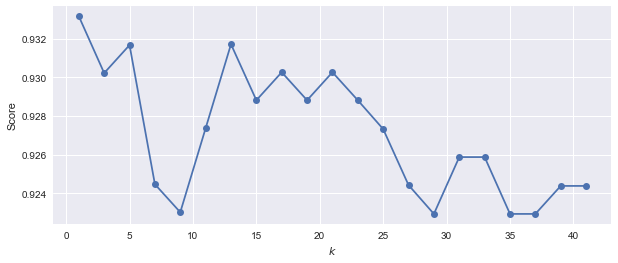

In [17]:
k_values = np.arange(1, 42, 2) # odd values from 1 to 42
k_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_resampled_train, y_resampled_train, cv=10, scoring='accuracy')
    avg_score = np.mean(scores)
    k_scores.append(avg_score)
    
# Plot the scores
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(k_values, k_scores, 'o-')
ax.set_xlabel('$k$')
ax.set_ylabel('Score')

It is clear that the score peaks at $k=5$.

### Evaluate Predictions

It is time to evaluate kNN where $k=5$ using a classification report. 

In [18]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_resampled_train, y_resampled_train)
y_resampled_predictions = knn.predict(X_resampled_test)

print(classification_report(y_resampled_test, y_resampled_predictions))

             precision    recall  f1-score   support

          0       0.93      0.98      0.95       153
          1       0.98      0.92      0.95       143

avg / total       0.95      0.95      0.95       296



These results for the under-sampled data are quite good. Here is the confusion matrix:

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_resampled_test, y_resampled_predictions)

array([[150,   3],
       [ 12, 131]])

Now let us predict on a subset of the whole data.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [21]:
predicted = knn.predict(X_test)

In [22]:
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99     85282
          1       0.06      0.91      0.11       161

avg / total       1.00      0.97      0.98     85443



In [23]:
print(confusion_matrix(y_test, predicted))

[[83013  2269]
 [   14   147]]
